# Introduction

This Jupyter Notebook is submitted as part of an application for a position at Danish Crown. The goal of this notebook is to explore and analyze the "Exports of Animals" dataset, which can be found at "https://github.com/dataisthenewbacon/chr". In this notebook, I will be investigating various aspects of the data, such as the country with more imports or the sender witch take the more time to report the transport.

I will try to show my skills in data analysis and visualization. The comments are only informative about the test data and do not contain any management advice.

Mabe, I am not made for the job but I search an internship of 3 month in danmark, for :
- Improve my english
- See other working methods and culture
- To complete my studies constraint of working a minimum 3 months in a foreign country.

So if you have any advice or if you know a company that can help me, I will be very happy.

So in this notebook we will explore 4 different graphs to understand the data better.

In the first place we will set up the data to manipulate it easily.

In [1]:
# Importing the libraries
import numpy as np  # For mathematical operations
import matplotlib.pyplot as plt  # For plotting
import matplotlib.ticker as mtick  # For formatting the y-axis as a time delta
import pandas as pd  # For loading tabular data and manipulating it

In [2]:
# Load the dataset from the github repository
dataset = pd.read_csv('https://raw.githubusercontent.com/dataisthenewbacon/chr/main/all_exports.csv')
dataset.head()

,transport_date,transport_time,sender_id,recipient_country,num_animals,reporting_datetime
0,2012-05-31,1315,80,PL,349,2012-06-01 15:12:26
1,2012-05-31,1315,80,PL,299,2012-06-01 15:15:34
2,2012-05-29,800,288,BE,97,2012-06-04 10:15:57
3,2012-05-29,800,288,BE,24,2012-06-04 10:15:57
4,2012-05-31,800,288,FR,12,2012-06-04 10:15:57


In [3]:
# Remove the rows with missing values
dataset = dataset.dropna()

# Remove the rows before 1st june 2012.
# It delete unwanted data or data that is not relevant to the analysis
dataset = dataset[dataset['transport_date'] >= '2012-06-01']

# Convert date strings to datetime objects because it's easier to work with
dataset['transport_date'] = pd.to_datetime(dataset['transport_date'])
dataset['reporting_datetime'] = pd.to_datetime(dataset['reporting_datetime'])

# Convert the transport_time column to a string with the format '%H%M'
dataset['transport_time'] = dataset['transport_time'].astype(str).str.zfill(4)

# Convert the string to a timedelta. It's important for comparing reported time and transport time
dataset['transport_time'] = pd.to_timedelta(dataset['transport_time'].str[:2] + ' hours ' + dataset['transport_time'].str[2:] + ' minutes')

# Showing the first 5 rows of the dataset
dataset.head()

,transport_date,transport_time,sender_id,recipient_country,num_animals,reporting_datetime
7,2012-06-01,0 days 08:00:00,120,RU,293,2012-06-04 10:15:57
8,2012-06-01,0 days 16:00:00,120,RU,269,2012-06-04 10:15:57
9,2012-06-01,0 days 08:00:00,120,RU,314,2012-06-04 10:15:57
10,2012-06-05,0 days 13:15:00,471,DE,87,2012-06-05 14:37:57
52,2012-06-01,0 days 04:00:00,2,DE,190,2012-06-06 13:31:29


## Country with the most import

In the first place, it could be interesting to see wich country has the most imports. In this way we can decide the comercial strategy of danish crown.

With these values we can take a decision to reinforce our business in these countries or to develop more international business in other countries.

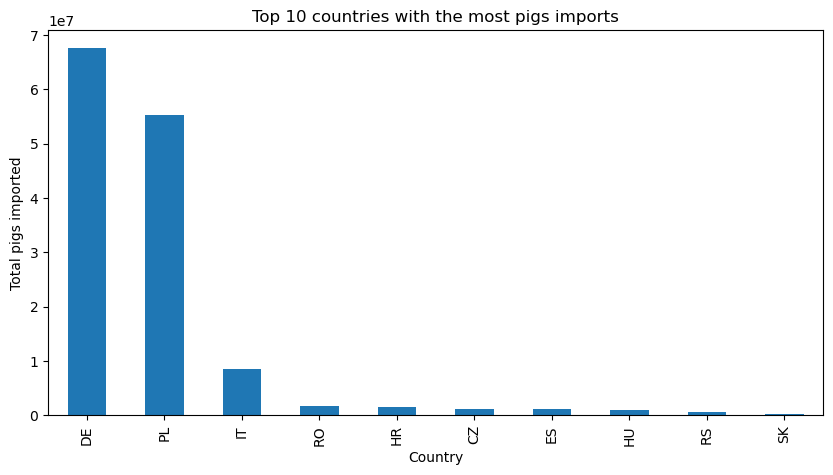

In [4]:
# Grouping the data by country
grouped = dataset.groupby('recipient_country')

# Summing the total value of the imports
grouped = grouped['num_animals'].sum()

# Sorting the data by the total value of the imports
grouped = grouped.sort_values(ascending=False)

# Plotting the top 10 countries with the most imports
grouped[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 countries with the most pigs imports')
plt.xlabel('Country')
plt.ylabel('Total pigs imported')
plt.show()

With the current dataset, we can see 2 countries with the most imports. These countries are Germany and Poland.
And we can see that Italy is the third country far behind the other two countries.

## Sender wich has the most exports

Here we will see wich supplier send the most pigs to the other countries. This is interesting for negotiate prices with the supplier or diversifies to not be dependent of one in particular.


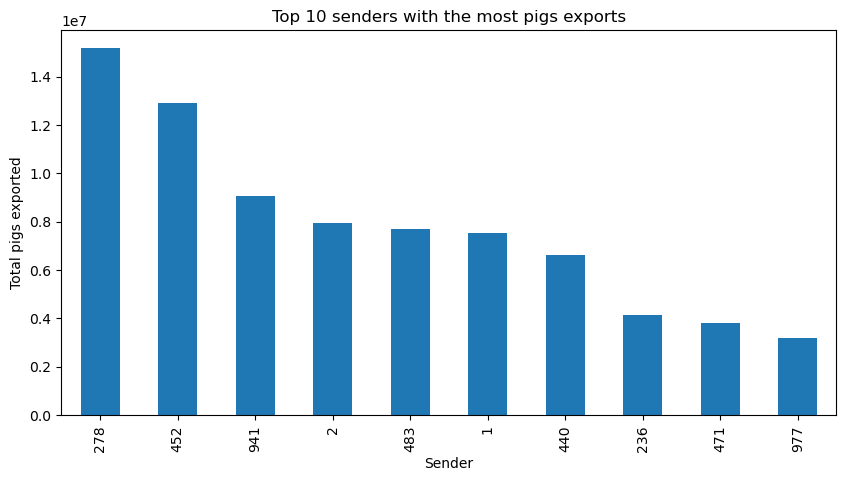

In [5]:
# Grouping the data by sender
grouped = dataset.groupby('sender_id')

# Summing the total value of the exports
grouped = grouped['num_animals'].sum()

# Sorting the data by the total value of the exports
grouped = grouped.sort_values(ascending=False)

# Plotting the top 10 senders with the most exports
grouped[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 senders with the most pigs exports')
plt.xlabel('Sender')
plt.ylabel('Total pigs exported')
plt.show()

With this graph, we can see that the resources are well distributed among all the suppliers.
But it would be interesting to see this graph on the last year to see if there is a supplier that has increased its exports.
Maybe we can see a dominant sender. In this case, it will be interesting to find out other pig sender.

## What is the trend of pig exports over time?

We can make a simple anilisis to see the trend of pig exports over time. With thiw we can know the actual company situation.


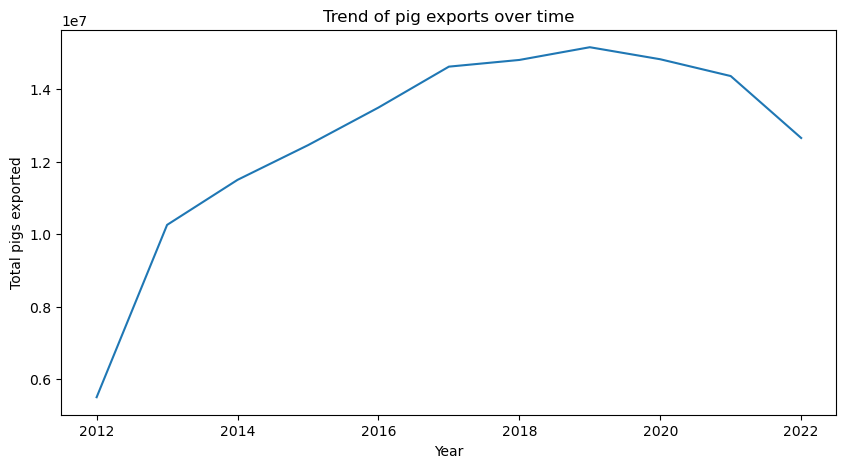

In [6]:
# Grouping the data by year
dataset_grouped_by_year = dataset.copy()
dataset_grouped_by_year['year'] = dataset_grouped_by_year['transport_date'].dt.year

grouped = dataset_grouped_by_year.groupby('year')

# Summing the total value of the exports
grouped = grouped['num_animals'].sum()

# Plotting the trend of pig exports over time
grouped.plot(kind='line', figsize=(10, 5))
plt.title('Trend of pig exports over time')
plt.xlabel('Year')
plt.ylabel('Total pigs exported')
plt.show()

So we can see that the trend of pig exports over time is increasing. This could be due to the fact that the population is increasing, and that the demand for pork is increasing.

But we can see a export decrease in 2020. This could be due to the fact that the covid-19 pandemic started in 2020, and that the demand for pork decreased.

## Are there any trends or patterns in pig exports to specific countries?

It could also be interesting to see if there are any trends or patterns in pig exports to specific countries.


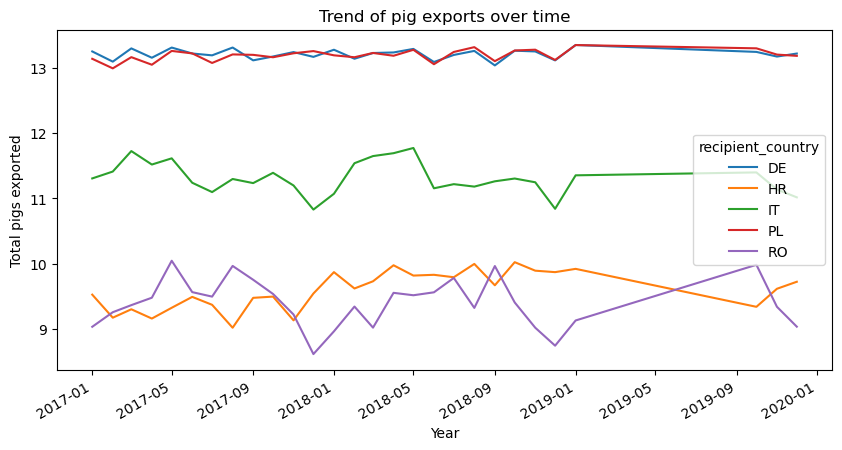

In [7]:
# Grouping the data by year and country
dataset_grouped_by_year_and_country = dataset.copy()
dataset_grouped_by_year_and_country['year_month'] = dataset_grouped_by_year_and_country['transport_date'].dt.year.astype(str) + '-' + dataset_grouped_by_year_and_country['transport_date'].dt.month.astype(str)

dataset_grouped_by_year_and_country = dataset_grouped_by_year_and_country[dataset_grouped_by_year_and_country['year_month'] <= '2019-12']
dataset_grouped_by_year_and_country = dataset_grouped_by_year_and_country[dataset_grouped_by_year_and_country['year_month'] >= '2017-1']

dataset_grouped_by_year_and_country['year_month'] = pd.to_datetime(dataset_grouped_by_year_and_country['year_month'], format='%Y-%m')

grouped = dataset_grouped_by_year_and_country.groupby(['year_month', 'recipient_country'])

# Summing the total value of the exports
grouped = grouped['num_animals'].sum()
grouped = np.log(grouped)

# Keep only the top 10 countries with the most exports
grouped_rank = dataset.groupby('recipient_country')
grouped_rank = grouped_rank['num_animals'].sum()
grouped_rank = grouped_rank.sort_values(ascending=False)

grouped = grouped[grouped.index.get_level_values(1).isin(grouped_rank[:5].index)]

# Plotting the trend of pig exports over time
grouped.unstack().plot(kind='line', figsize=(10, 5))
plt.title('Trend of pig exports over time')
plt.xlabel('Year')
plt.ylabel('Total pigs exported')
plt.show()

This insight isn't realy relevant because we can't say anything about it. All we can say is that countries ask a constant number of pigs over years.

## Is reporting time differ from sender ?

It is important to know if the supplier we work with make good works.
So we can verify if they are on time or not.


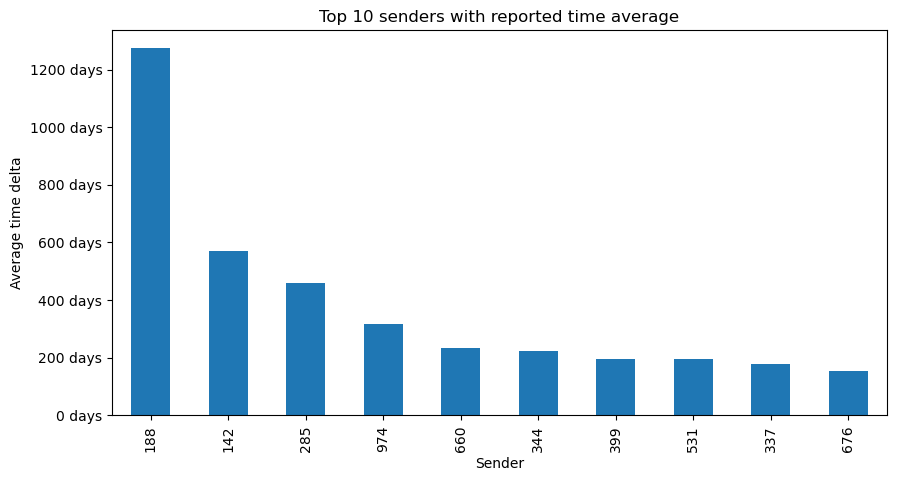

In [8]:
# Make time delta between reporting time and transport time
dataset_time_delta = dataset.copy()
dataset_time_delta['transport_datetime'] = dataset_time_delta['transport_date']+(dataset_time_delta['transport_time'])
dataset_time_delta['time_delta'] = dataset_time_delta['reporting_datetime'] - dataset_time_delta['transport_datetime']

dataset_time_delta['time_delta'] = dataset_time_delta['time_delta'].dt.total_seconds()/(3600 * 24)

# Grouping the data by sender
grouped = dataset_time_delta.groupby('sender_id')

# Summing the total value of the exports
grouped = grouped['time_delta'].mean()

# Sorting the data by the total value of the exports
grouped = grouped.sort_values(ascending=False)

# Plotting the top 10 senders with reported time average*
grouped[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 senders with reported time average')
plt.xlabel('Sender')
plt.ylabel('Average time delta')


# Define the custom formatter
def custom_formatter(x, pos):
    return '{0:.0f} days'.format(x)

# Set the formatter
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))

plt.show()

With these results, we can see sender 188 don't report in time. For him, he takes about 4 years to report his transport.

So there is 2 reasons for this :
- He is not on time
- The data is not correct

We can't know which one is the case, but we can see that the sender 188 is not a good supplier.

## About me

I am a student at the University of Franche-Comte in France. I am currently in my 3rd year of a Master's degree [CMI (in french)](http://formation.univ-fcomte.fr/cmi/informatique) and i search for a 3 month internship in data science and begin the 2nd april (I will work on site not remotely).

I like to work on data science projects, and maybe when I will be better at it, I will try to learn more about machine learning.

For the moment, i don't have much projects about data science, but I am working on it. I am currently learning about how manipulate data to train neral network model, making courses on [pytorch](https://pytorch.org/tutorials/beginner/basics/intro.html).

If you have any questions, or if you want more details about me, you can contact me on [LinkedIn](https://www.linkedin.com/in/alphee-grosdidier/) or send me an email at [alphee.grosdidier.pro@gmail.com](mailto:alphee.grosdidier.pro@gmail.com)